#  Heart Failure Prediction

### <font color = 'green'>Problem Statement<font>

A machine learning model can be of significant assistance in the early detection and management of cardiovascular disease and high cardiovascular risk individuals (due to the existence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia, or already established disease).
Using AI methods, we automate the solution to yet another natural phenomenon in the hopes of mitigating it and moving on to the next issue.





### <font color = 'green'>Research questions<font>

- What Machine Learning algorithms are used in the diagnosis of heart
disease?
- What machine learning model was best suited for the prediction?
- How can Machine Learning be used to detect early abnormalities, thus
benefiting both patients and the healthcare system?

### <font color = 'green'>View our Data<font>

 
**[Source of data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

**Attribute Information**

* Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [6]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from time import time
%matplotlib inline

In [8]:
#Load in the data
#url = "https://raw.githubusercontent.com/bopola/Tech4Dev_Bella/main/heart.csv"
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis (EDA)

In [9]:
heart.shape

(918, 12)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#check for null values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing data in this dataset

In [10]:
#statistical summary of the dataset
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


A wide range of ages is represented, with 53 being the mean, 28 being the lowest and 77 the highest.

Individuals typically have a blood pressure of 130, with a maximum reading of around 200.


Cholesterol ranges from 109 at the low end to 603 at the high end.

The max of FastingBS is 1.

MaxHR ranges from 202 at its peak to 195 at its lowest.
Oldpeak's highest point is 6.2%.

The maximum value for HeartDisease is 1.

## Brief personal analysis before the main one

 Soo, firstly out of curoiusity, i want to know if heart failure tend to occur more in men or wamen, and what the ratio is

In [15]:
heart_failure=heart[heart["HeartDisease"]==1]
heart_failure.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [25]:
heart_failure.count()

Age               508
Sex               508
ChestPainType     508
RestingBP         508
Cholesterol       508
FastingBS         508
RestingECG        508
MaxHR             508
ExerciseAngina    508
Oldpeak           508
ST_Slope          508
HeartDisease      508
dtype: int64

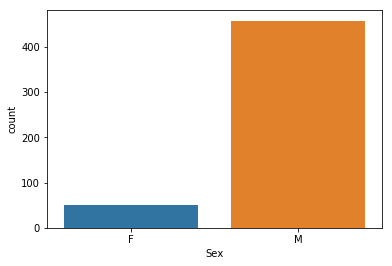

In [27]:
# heart_men=heart_failure[heart_failure["Sex"]=="M"]
# heart_women=heart_failure[heart_failure["Sex"]=="F"]


#visualizing

sb.countplot(x=heart_failure.Sex)



soo, from our analysis, we can see that men are more at risk of having a heart failure than women, in a ratio of 10:1

My next question is, does the cholesterol level of a person have a significant role to play in determining if they would suffer a heart disease or not.

To answer this. i would first want to know what the average cholesterol level of a person is, and Google says its average at abougt 200 and high at about 240.

In [31]:
c=heart_failure[heart_failure["Cholesterol"]>=240].count()
c

#sb.countplot(x=heart_failure.Cholesterol)


Age               191
Sex               191
ChestPainType     191
RestingBP         191
Cholesterol       191
FastingBS         191
RestingECG        191
MaxHR             191
ExerciseAngina    191
Oldpeak           191
ST_Slope          191
HeartDisease      191
dtype: int64

#### Univariate Analysis
Observations on a single characteristics or attribute

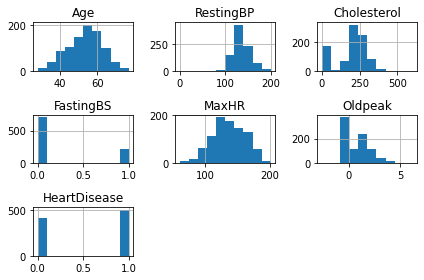

In [ ]:
heart[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].hist()
# df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

###### Age

In [ ]:
sb.histplot(heart.Age, kde=True);

We see that age of individuals in this dataset is slighly skewed to the left with 55 being the peak age

###### Sex

In [ ]:
total = heart.shape[0]
ax = sb.countplot(x=heart.Sex)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y));

We see 21% of our data is female, so we should expect a bias towards male

###### Chest Pain Type

In [ ]:
heart.ChestPainType.value_counts().sort_values(ascending=False).index.to_list()

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(x=heart.ChestPainType, color=base_color, order=heart.ChestPainType.value_counts().sort_values(ascending=False).index.to_list());

Angina is a type of chest pain caused by reduced blood flow to the heart  
TA: Typical Angina  
ATA: Atypical Angina  
NAP: Non-Anginal Pain  
ASY: Asymptomatic

###### Resting BP and Cholesterol

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sb.histplot(heart.RestingBP, kde=True)
plt.ylabel("")

plt.subplot(1,2,2)
sb.histplot(heart.Cholesterol, kde=True)
plt.ylabel("");

BP: We have some very low values, lower than 75, however the values between 75 and 200 seem to follow a normal distribution. We can further explore for outliers.  
Cholesterol: We see many values with 0 cholesterol, which is unusual

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sb.boxplot(x=heart.RestingBP)
plt.ylabel("")

plt.subplot(1,2,2)
sb.boxplot(x=heart.Cholesterol)
plt.ylabel("");


We see 2 outliers with resting bp below 80mmHg, and several with very high resting BPs above 170mmhg

In [ ]:
heart[heart.RestingBP < 90]

Could there be an error in the entries? Having resting bp and/or cholesterol seems unusual  

NB: FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

In [ ]:
heart[heart.RestingBP > 170]

In [ ]:
heart[(heart.RestingBP==0)|heart.Cholesterol==0]

Many rows with weird cholestrol and/or resting bp

###### Fasting Blood Sugar


In [ ]:
(172/918)*100

In [ ]:
ax=sb.countplot(x=heart.FastingBS)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y));

23.3% of individuals had a fasting blood sugar > 120 mg/dl

###### Maximum Heart Rate

In [ ]:
sb.histplot(heart.MaxHR, kde=True);

###### Old Peak

In [ ]:
sb.histplot(heart.Oldpeak, kde=True);

##### Resting ECG

In [ ]:
sb.countplot(x=heart.RestingECG, color=base_color, order=heart.RestingECG.value_counts().sort_values(ascending=False).index.to_list());

Normal: Normal  
ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

##### Excercise Angina

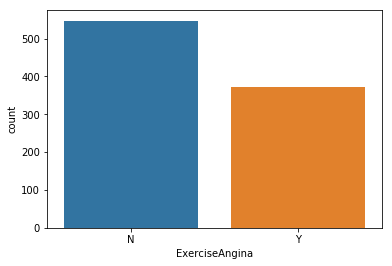

In [23]:
sb.countplot(x=heart.ExerciseAngina);

##### ST Slope

In [ ]:
sb.countplot(x=heart.ST_Slope);

##### Heart Disease

In [ ]:
sb.countplot(x=heart.HeartDisease);

#### Bivariate Analysis

In [ ]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

##### Correlation

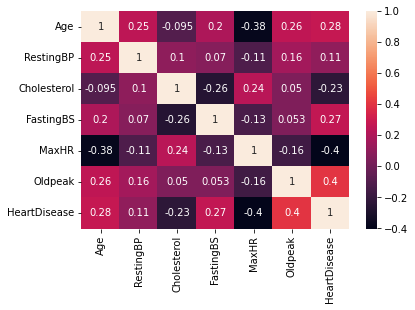

In [ ]:
sb.heatmap(heart.corr(), annot=True)

We notice very little correlation among the variables

##### Age and Heart Disease

NameError: ignored

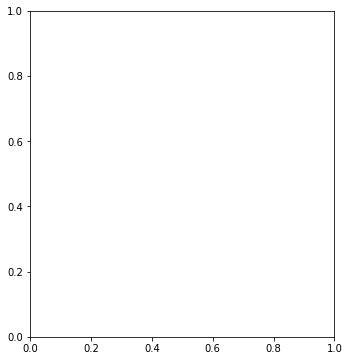

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.violinplot(data=heart, x="HeartDisease", y="Age", color=base_color)

plt.subplot(1,2,2)
sb.violinplot(data=heart, x="ChestPainType", y="Age", color=base_color)


From the plot, we notice there are fewer young people, <40 years with heart disease than old people with most people with heart disease being above 50 years.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.violinplot(data=heart, x="ChestPainType", y="RestingBP", color=base_color)

plt.subplot(1,2,2)
sb.violinplot(data=heart, x="ChestPainType", y="Cholesterol", color=base_color)


The different classes of chest pain seem to have similar resting BPs, same with cholesterol

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, hue= "ChestPainType", x="HeartDisease", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "ChestPainType", hue="HeartDisease", palette="Oranges");




TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  

We see that even people withput heart disease had some form of chest pain, most people with heart disease were asymptomatic. 
Generally, most people were asymptomatic, and a higher proportion of asymptomatic patients had heart disease, very few people had typical angina.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, x= "ChestPainType", hue="ExerciseAngina", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "ExerciseAngina", hue="HeartDisease", palette="Oranges");





Also, a higher proportion of those that were asymptomatic had exercise induced angina. A small proportion of those without heart disease had exercise induced angina.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=heart, hue= "ST_Slope", x="HeartDisease", palette="Blues");


plt.subplot(1,2,2)
sb.countplot(data=heart, x= "FastingBS", hue="HeartDisease", palette="Oranges");




A large proportionof patients with heart disease had  Flat ST Slope, and Up slope was most common among those without heart disease

#### Clean the Data

- Replaced 0 with ffill which gave a final mean that was closest to the mean when 0 values were present for the <font color = 'red'>'Cholesterol'</font> and <font color = 'red'>'RestingBP'</font> attributes.
- No columns were dropped.

In [ ]:
#replace 0 values with ffill
heart['Cholesterol'].replace(to_replace = 0,  method='ffill', inplace=True)
heart['Cholesterol'].value_counts()

In [ ]:
##replace 0 values with ffill
heart['RestingBP'].replace(to_replace = 0,  method='ffill', inplace=True)
heart['RestingBP'].value_counts()

In [ ]:
heart.info()

In [ ]:
heart.head()

## Modelling and Prediction

### Preprocessing
X as the features

y as the target

In [ ]:
#import machine learning libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
 X = heart.loc[:, ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
 X.head()

In [ ]:
#convert categorical data to numeric
le_Sex = LabelEncoder()
le_ChestPainType = LabelEncoder()
le_FastingBS = LabelEncoder()
le_RestingECG = LabelEncoder()
le_ExerciseAngina = LabelEncoder()
le_ST_Slope = LabelEncoder()


In [ ]:
#use fit_transform
X['Sex'] = le_Sex.fit_transform(X['Sex'])
X['ChestPainType'] = le_ChestPainType.fit_transform(X['ChestPainType'])
X['FastingBS'] = le_FastingBS.fit_transform(X['FastingBS'])
X['RestingECG'] = le_RestingECG.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le_ExerciseAngina.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le_ST_Slope.fit_transform(X['ST_Slope'])

#convert float to int
X['Oldpeak'] = X['Oldpeak'].astype('int')
X.head()

In [ ]:
#run onehotencoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(X[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]).toarray())
enc_df.columns = enc.get_feature_names_out(input_features=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
enc_df

In [ ]:
X = X.join(enc_df)
X

In [ ]:
feat_list = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
X.drop(columns = feat_list, axis = 1, inplace =True)
X.head()

In [ ]:
X.info()

In [ ]:
 y = heart.loc[:, ['HeartDisease']]
 y.info()

### Train/Test/Split


We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [ ]:
#split/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print('X_train is:', X_train.shape)
print('y_train is :', y_train.shape)

### <font color = 'green'>Models used and why they were selected<font>



1.   Logistic regression
2.   Decision tree
1.   Random Forest
2.   Support Vector Machine (SVM)
1.   KNN
2.   Bagging

#### 1. Logistic Regression

In [ ]:
#instantite the model
from sklearn.linear_model import LogisticRegression
lr = LR = LogisticRegression(C=0.01, solver='liblinear')
t0 = time()

#fit the model
lr.fit(X_train,y_train)

# model score ant training time
lr_score = lr.score(X_test,y_test)

print("Logistic Regression Score: ", lr_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

In [ ]:
#predict
pred_lr = lr.predict(X_test)
pred_lr[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, pred_lr))

In [ ]:
# evaluation confusion matrix
conf_mat_lr =(confusion_matrix(y_test,pred_lr, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_lr

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_lr, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_lr))

#### 2. Decision Tree 

In [ ]:
#instantite the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 42)
    
#fit the model
dt.fit(X_train,y_train)

#Calculate time
t0 = time()

# model score
dt_score = dt.score(X_test,y_test)

print("Decision Tree's Score: ", dt_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

In [ ]:
#predict
pred_dt = dt.predict(X_test)
pred_dt[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_dt))

In [ ]:
# evaluation confusion matrix
conf_mat_dt =(confusion_matrix(y_test,pred_dt, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_dt

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_dt, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_dt))

In [ ]:
#visualize the decision tree!
tree.plot_tree(dt)
plt.show()

#### 3. Random Forest

In [ ]:
# import and Instantiate the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)

#Calculate time
t0 = time()

#fit the model
rf.fit(X_train, y_train)

#calculate score
rf_score = rf.score(X_test, y_test)

print("Random Forest Score: ", rf_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

In [ ]:
#predict
pred_rf = rf.predict(X_test)
pred_rf[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forests's Accuracy: ", metrics.accuracy_score(y_test, pred_rf))

In [ ]:
# evaluation confusion matrix
conf_mat_rf =(confusion_matrix(y_test,pred_rf, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_rf

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_rf, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_rf))

#### 4. Support Vector Machine (SVM)

In [ ]:
# import and Instantiate the model
from sklearn.svm import SVC
svmc = SVC()

#Calculate time
t0 = time()

#fit the model
svmc.fit(X_train, y_train)

#calculate score
svmc_score = svmc.score(X_test, y_test)

print("SVM Score: ", svmc_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))


In [ ]:
#predict
pred_svmc = svmc.predict(X_test)
pred_svmc[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, pred_svmc))

In [ ]:
# evaluation confusion matrix
conf_mat_svmc =(confusion_matrix(y_test,pred_svmc, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_svmc

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_svmc, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_svmc))

#### 5. KNN

In [ ]:
# import and Instantiate the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)

#calculate time
t0 = time()

#fit the model
knn.fit(X_train, y_train)

#calculate score
knn_score = knn.score(X_test, y_test)

print("KNN Score: ", knn_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))


In [ ]:
#predict
pred_knn = knn.predict(X_test)
pred_knn[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, pred_knn))

In [ ]:
# evaluation confusion matrix
conf_mat_knn =(confusion_matrix(y_test,pred_knn, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_knn

In [ ]:
#import make_classification and plot the confusion matrix
sb.heatmap(conf_mat_knn, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_knn))

#### 6. Bagging

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=20, random_state=0)

#calculate time 
t0 = time()

#fit the model
bag.fit(X_train, y_train)

#calculate score
bag_score = bag.score(X_test, y_test)
bag_score

print("Bagging Score: ", bag_score)
print("Training time: {} seconds.".format(round(time()-t0, 3)))

In [ ]:
#predict
pred_bag = bag.predict(X_test)
pred_bag[0:5]

In [ ]:
# evaluation; accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


print("Bagging's Accuracy: ", metrics.accuracy_score(y_test, pred_bag))

In [ ]:
# evaluation confusion matrix
conf_mat_bag =(confusion_matrix(y_test,pred_bag, labels = [1,0])) #use labels to be explicit on the order of 1 and 0
conf_mat_bag

In [ ]:
#import make_classification and plot the confusion matrix
sns.heatmap(conf_mat_bag, annot = True, cmap='Purples', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

In [ ]:
#classification report
print(classification_report(y_test,pred_bag))

- Type your observations here

- Type your recommendations here

## <font color = 'blue'>Conclusion<font>

We did exploration of the data to get a hinge of the data. We then performed Univariate and Bivariate analyses, as well as data visualization were performed on the target and features variables.

To ensure that this forecast is as accurate as possible, we also performed a full feature engineering which includes all of the necessary valid processes for the model engineering.

Based on the aforementioned model accuracy, Random Forest provided 90% accuracy. Demonstrating that it is the most appropriate model for the prediction.

We did exploration of the data to get a hinge of the data. We then performed Univariate and Bivariate analyses, as well as data visualization were performed on the target and features variables.

To ensure that this forecast is as accurate as possible, we also performed a full feature engineering  which includes all of the necessary valid processes for the model engineering.

Based on the aforementioned model accuracy, Random Forest provided 90% accuracy. Demonstrating that it is the most appropriate model for the prediction.